In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r'C:\Users\Shreedevi Tallam\Downloads\Dev\Finance\MSFT.csv', index_col='Date', parse_dates=True, usecols=['Date','Close'])

In [40]:
df.head()

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090


In [41]:
df.tail()

,Close
Date,
2020-04-03,153.830002
2020-04-06,165.270004
2020-04-07,163.490005
2020-04-08,165.130005
2020-04-09,165.139999


In [42]:
len(df)

8590

In [43]:
test_size = 8
test_ind = len(df) - test_size
train = df[:test_ind]
test = df[test_ind:]

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [47]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [48]:
length = 5
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=1)

In [49]:
validation_generaton = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size=1)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [51]:
model = Sequential()

model.add(LSTM(256, input_shape=(length, n_features), activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [59]:
model.fit_generator(generator, epochs=20,
                   validation_data=validation_generaton,
                   callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8577 steps, validate for 3 steps
Epoch 1/20
8577/8577 [==============================] - 53s 6ms/step - loss: 7.3374e-05 - val_loss: 6.2202e-04
Epoch 2/20
8577/8577 [==============================] - 57s 7ms/step - loss: 6.1570e-05 - val_loss: 5.4547e-05
Epoch 3/20
8577/8577 [==============================] - 53s 6ms/step - loss: 5.4773e-05 - val_loss: 4.0967e-05
Epoch 4/20
8577/8577 [==============================] - 53s 6ms/step - loss: 5.8760e-05 - val_loss: 2.2449e-05
Epoch 5/20
8577/8577 [==============================] - 53s 6ms/step - loss: 4.8863e-05 - val_loss: 1.5242e-05
Epoch 6/20
8577/8577 [==============================] - 53s 6ms/step - loss: 4.4307e-05 - val_loss: 0.0013
Epoch 7/20
8577/8577 [==============================] - 53s 6ms/step - loss: 4.2908e-05 - val_loss: 9.3009e-05
Epoch 8/20
8577/8577 [==============================] - 54s 6ms/step - loss: 4.2075e-05 - val_loss: 3.6486e-05


In [60]:
losses = pd.DataFrame(model.history.history)

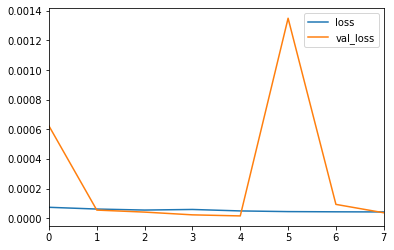

In [61]:
losses.plot()

In [62]:
test_predictions = []
length = 5

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [63]:
true_pred = scaler.inverse_transform(test_predictions)

In [64]:
test['Predictions'] = true_pred

C:\Users\Shreedevi Tallam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


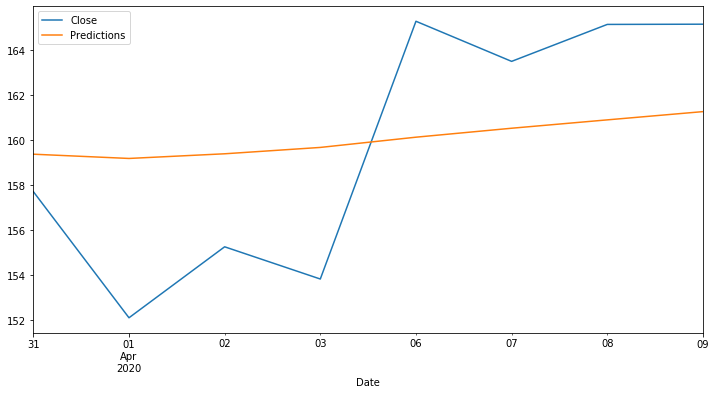

In [65]:
test.plot(figsize=(12,6))

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Close'], test['Predictions']))

4.63943128011318

In [67]:
scaled_full_data = scaler.fit_transform(df)

In [68]:
scaled_full_data.shape

(8590, 1)

In [69]:
length = 5 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [106]:
from tensorflow.keras.layers import Dropout

In [107]:
model = Sequential()
model.add(LSTM(256, input_shape=(length, n_features), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [108]:
model.fit_generator(generator, epochs=8)

  ...
    to  
  ['...']
Train for 8585 steps
Epoch 1/8
8585/8585 [==============================] - 57s 7ms/step - loss: 7.6756e-04
Epoch 2/8
8585/8585 [==============================] - 58s 7ms/step - loss: 4.7343e-04
Epoch 3/8
8585/8585 [==============================] - 57s 7ms/step - loss: 5.0430e-04
Epoch 4/8
8585/8585 [==============================] - 56s 7ms/step - loss: 4.2912e-04
Epoch 5/8
8585/8585 [==============================] - 56s 7ms/step - loss: 4.0214e-04
Epoch 6/8
8585/8585 [==============================] - 58s 7ms/step - loss: 3.9678e-04
Epoch 7/8
8585/8585 [==============================] - 57s 7ms/step - loss: 3.9483e-04
Epoch 8/8
8585/8585 [==============================] - 57s 7ms/step - loss: 3.9329e-04


In [97]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 5

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [98]:
df.tail()

,Close
Date,
2020-04-03,153.830002
2020-04-06,165.270004
2020-04-07,163.490005
2020-04-08,165.130005
2020-04-09,165.139999


In [99]:
true_forecast = scaler.inverse_transform(forecast)

In [100]:
forecast_index = pd.date_range(start='2020-04-10',periods=periods,freq='D')

In [101]:
forecast_df = pd.DataFrame(data=true_forecast, index = forecast_index, columns=['Forecast'])

In [102]:
df.head()

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090


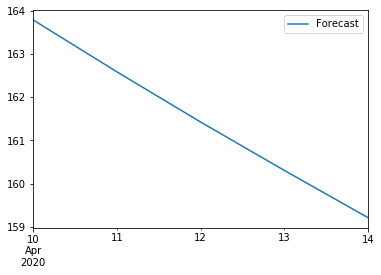

In [103]:
forecast_df.plot()

(737501.0, 737530.0)

<Figure size 864x576 with 0 Axes>

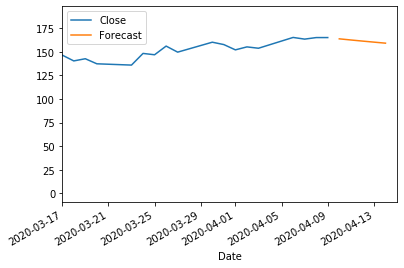

In [104]:
plt.figure(figsize=(12,8))
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2020-03-17', '2020-04-15')

In [105]:
forecast_df

,Forecast
2020-04-10,163.790580
2020-04-11,162.587707
2020-04-12,161.424395
2020-04-13,160.302925
2020-04-14,159.207076


In [87]:
from tensorflow.keras.models import load_model 

In [94]:
forecast_df.round(3)

,Forecast
2020-04-10,165.628
2020-04-11,166.197
2020-04-12,166.747
2020-04-13,167.318
2020-04-14,167.891


In [90]:
msft = model.save('msft.h5')